# Part 2: Advanced Data Visualization

This phase focuses on enhancing the dataset by creating meaningful features that capture **temporal patterns, store-specific behaviors, and promotional effects**. It also includes **visual exploration to uncover trends, seasonality, and anomalies—laying** the groundwork for robust forecasting models.


## 1. Setup & Imports Libraries
-------------------------------

In [1]:
import time 

In [2]:
# Step 1: Setup & Imports Libraries
print("Step 1: Setup and Import Libraries started...")
time.sleep(1)  # Simulate processing time

Step 1: Setup and Import Libraries started...


In [3]:
# Data Manipulation & Processing
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime
from sklearn.preprocessing import *

# Data Visualization
import seaborn as sbn
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import scatter_matrix

sbn.set(rc={'figure.figsize':(14,6)})
plt.style.use('seaborn-v0_8')
sbn.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [4]:
print("="*60)
print("Rossman Store Sales Time Series Analysis - Part 2")
print("="*60)
print("All libraries imported successfully!")
print("Analysis Date:", pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'))


Rossman Store Sales Time Series Analysis - Part 2
All libraries imported successfully!
Analysis Date: 2025-08-05 10:02:54


In [5]:
print("✅ Setup and Import Liraries completed.\n")

✅ Setup and Import Liraries completed.



In [6]:
# Start analysis
part_2_begin = pd.Timestamp.now()

bold_start = '\033[1m'
bold_end = '\033[0m'

print("🔍 Part 2 Started ...")
print(f"🟢 Begin Date: {bold_start}{part_2_begin.strftime('%Y-%m-%d %H:%M:%S')}{bold_end}\n")

🔍 Part 2 Started ...
🟢 Begin Date: 2025-08-05 10:02:54




## Restore the file
----------------------------

In [7]:
%store -r df_features

### View or Display Dataset

In [8]:
df_features.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,isholiday,isschoolDay,day,week,month,quarter,year,isweekend
982643,1115,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982640,1112,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982639,1111,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982638,1110,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982637,1109,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False


In [9]:
print("✅ Data Engineering completed.\n")

✅ Data Engineering completed.



### 3.2 Percentage Distribution per Holiday Type

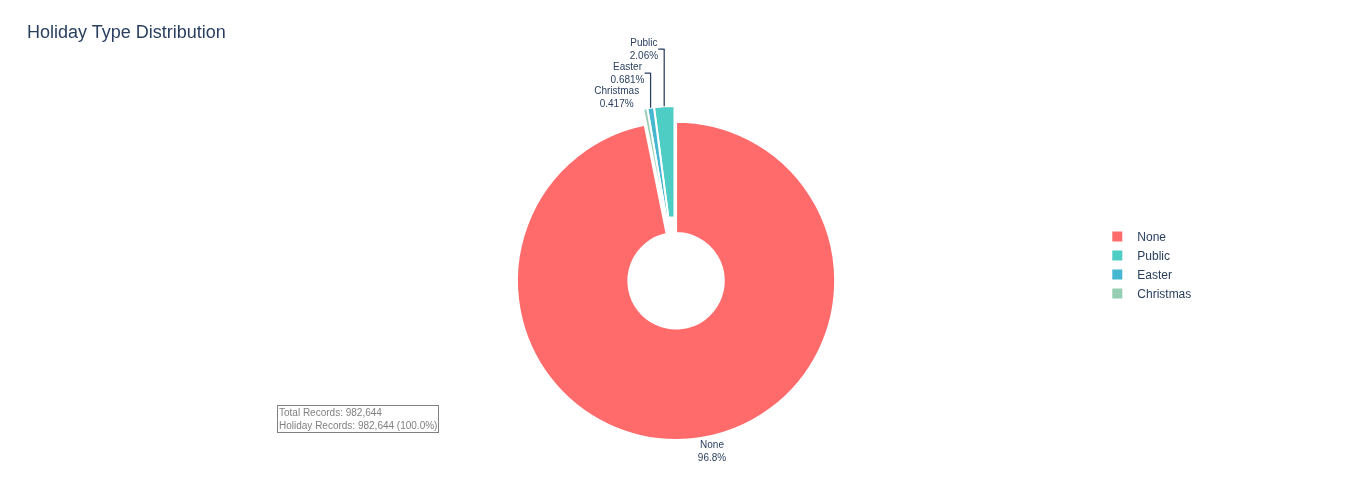


Holiday Type Value Counts:
------------------------------
None: 951,594 (96.84%)
Public: 20,260 (2.06%)
Easter: 6,690 (0.68%)
Christmas: 4,100 (0.42%)

Total: 982,644 records


In [10]:

# Get value counts efficiently
value_counts = df_features['stateholiday'].value_counts()
values = value_counts.values
labels = value_counts.index.tolist()

# Use original labels since holidaytype is already mapped from stateholiday
readable_labels = [str(label) for label in labels]

# Create pie chart with enhanced styling
fig = go.Figure(data=go.Pie(
    values=values,
    labels=readable_labels,
    pull=[0.1 if i == 0 else 0 for i in range(len(values))],  # Explode largest slice
    hole=0.3,  # Donut chart for better readability
    textinfo='label+percent',
    textposition='outside',
    textfont=dict(size=10),
    insidetextorientation='radial',
    marker=dict(
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
        line=dict(color='#FFFFFF', width=2)
    )
))

# Enhanced layout
fig.update_layout(
    title={
        'text': 'Holiday Type Distribution',
        'x': 0.02,  # Position on the left side
        'xanchor': 'left',
        'y': 0.95,  # Position at the top
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.01
    ),
    margin=dict(t=80, b=60, l=80, r=180),
    width=800,
    height=500
)

# Add summary statistics positioned to avoid obstruction
total_records = len(df_features)
holiday_records = len(df_features[df_features['stateholiday'] != 0])
holiday_percentage = (holiday_records / total_records) * 100

fig.add_annotation(
    text=f"Total Records: {total_records:,}<br>Holiday Records: {holiday_records:,} ({holiday_percentage:.1f}%)",
    xref="paper", yref="paper",
    x=0.02, y=0.02,  # Bottom left corner
    showarrow=False,
    font=dict(size=10, color="gray"),
    align="left",
    bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent background
    bordercolor="gray",
    borderwidth=1
)

fig.show()

# Display value counts for reference
print("\nHoliday Type Value Counts:")
print("-" * 30)
for label, count in zip(readable_labels, values):
    percentage = (count / total_records) * 100
    print(f"{label}: {count:,} ({percentage:.2f}%)")
print(f"\nTotal: {total_records:,} records")

### 3.3 Percentage Distribution per School Holiday

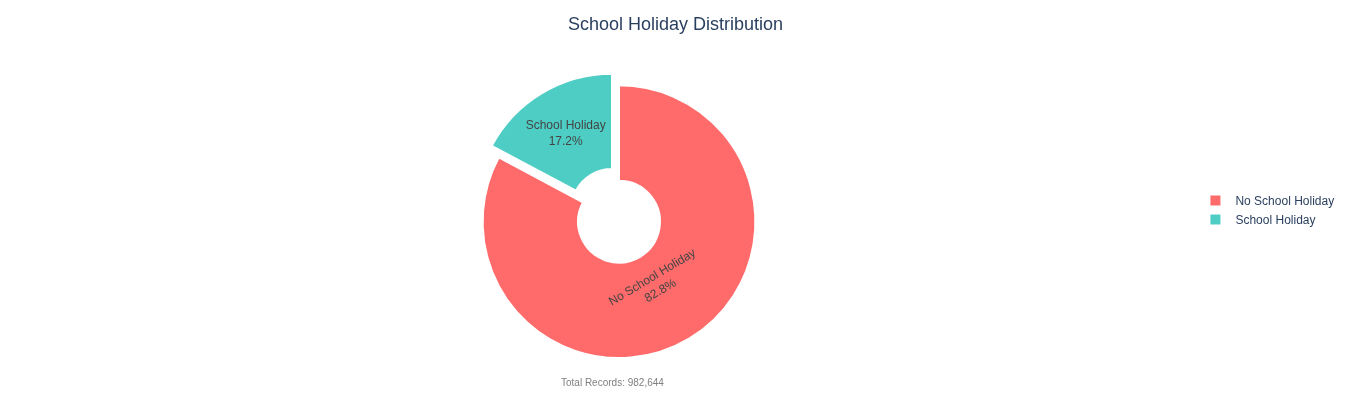

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Get value counts and create labels more efficiently
value_counts = df_features['schoolholiday'].value_counts()
values = value_counts.values
labels = ['School Holiday' if x == 1 else 'No School Holiday' for x in value_counts.index]

# Create pie chart with improved styling
fig = go.Figure(data=go.Pie(
    values=values,
    labels=labels,
    pull=[0.1, 0],  # Explode first slice
    hole=0.3,  # Creates a donut chart for better readability
    textinfo='label+percent',
    textposition='auto',
    marker=dict(
        colors=['#FF6B6B', '#4ECDC4'],  # Custom colors
        line=dict(color='#FFFFFF', width=2)
    )
))

# Enhanced layout with better formatting
fig.update_layout(
    title={
        'text': 'School Holiday Distribution',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.01
    ),
    margin=dict(t=60, b=40, l=40, r=120),
    width=600,
    height=400
)

# Add annotations for better context
total_records = len(df_features)
fig.add_annotation(
    text=f"Total Records: {total_records:,}",
    xref="paper", yref="paper",
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=10, color="gray")
)

fig.show()

### 3.4 Sales Distribution

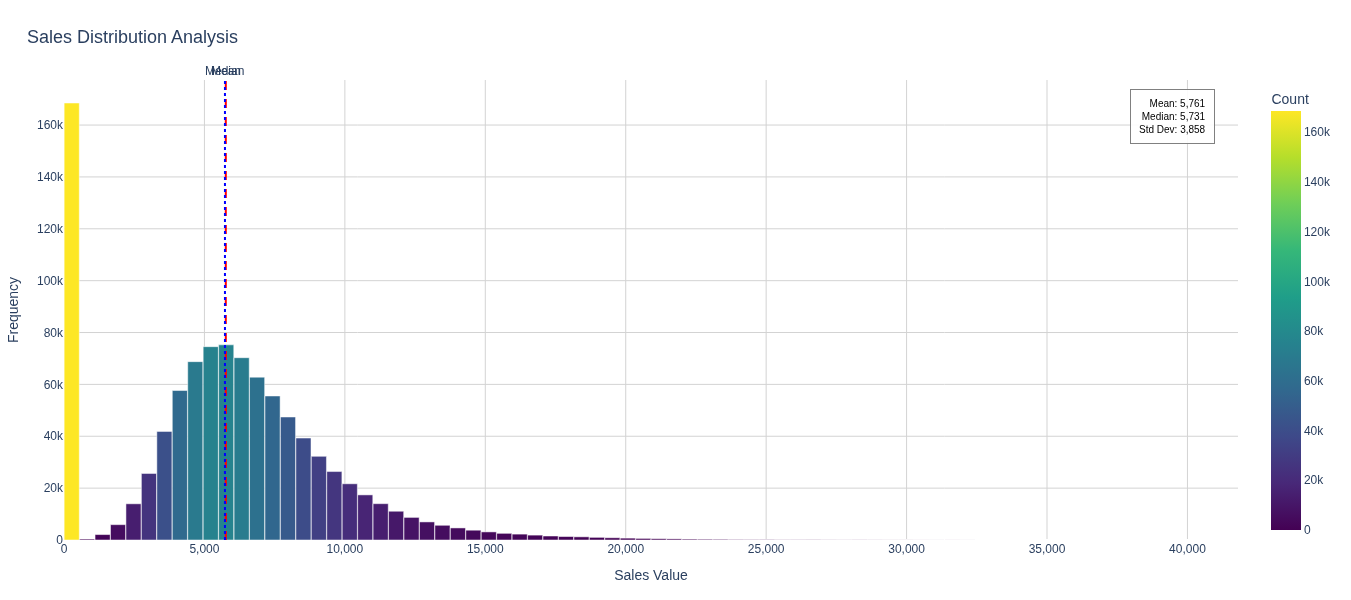


Sales Distribution Summary:
----------------------------------------
Total Records: 982,644
Min Sales: 0
Max Sales: 41,551
Mean Sales: 5,760.84
Median Sales: 5,731.00
Standard Deviation: 3,857.57
Bin Width: 550
Number of Bins: 76


In [12]:

# Create histogram bins more efficiently
max_sales = df_features['sales'].max()
bin_width = 550
bins = np.arange(0, max_sales + bin_width, bin_width)

# Calculate histogram
counts, bin_edges = np.histogram(df_features['sales'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create improved bar chart
fig = px.bar(
    x=bin_centers, 
    y=counts,
    labels={
        'x': 'Sales Value', 
        'y': 'Frequency',
        'color': 'Count'
    },
    title='Sales Distribution',
    color=counts,  # Color gradient based on frequency
    color_continuous_scale='viridis'
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Sales Distribution Analysis',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Sales Value',
    yaxis_title='Frequency',
    bargap=0.02,  # Minimal gap for histogram effect
    font=dict(size=12),
    plot_bgcolor='white',
    width=1300,
    height=600,
    margin=dict(t=80, b=60, l=60, r=60),
    # FIXED: Proper axis formatting for px.bar figures
    xaxis=dict(
        tickformat=',',  # Add thousands separator
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

# Improve trace styling
fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white'
)

# Add statistical annotations
mean_sales = df_features['sales'].mean()
median_sales = df_features['sales'].median()
std_sales = df_features['sales'].std()

fig.add_annotation(
    text=f"Mean: {mean_sales:,.0f}<br>Median: {median_sales:,.0f}<br>Std Dev: {std_sales:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

# Add vertical lines for mean and median
fig.add_vline(
    x=mean_sales, 
    line_dash="dash", 
    line_color="red",
    annotation_text="Mean",
    annotation_position="top"
)

fig.add_vline(
    x=median_sales, 
    line_dash="dot", 
    line_color="blue",
    annotation_text="Median",
    annotation_position="top"
)

fig.show()

# Print summary statistics
print("\nSales Distribution Summary:")
print("-" * 40)
print(f"Total Records: {len(df_features):,}")
print(f"Min Sales: {df_features['sales'].min():,}")
print(f"Max Sales: {df_features['sales'].max():,}")
print(f"Mean Sales: {mean_sales:,.2f}")
print(f"Median Sales: {median_sales:,.2f}")
print(f"Standard Deviation: {std_sales:,.2f}")
print(f"Bin Width: {bin_width}")
print(f"Number of Bins: {len(counts)}")

### 3.4 Customers Distribution

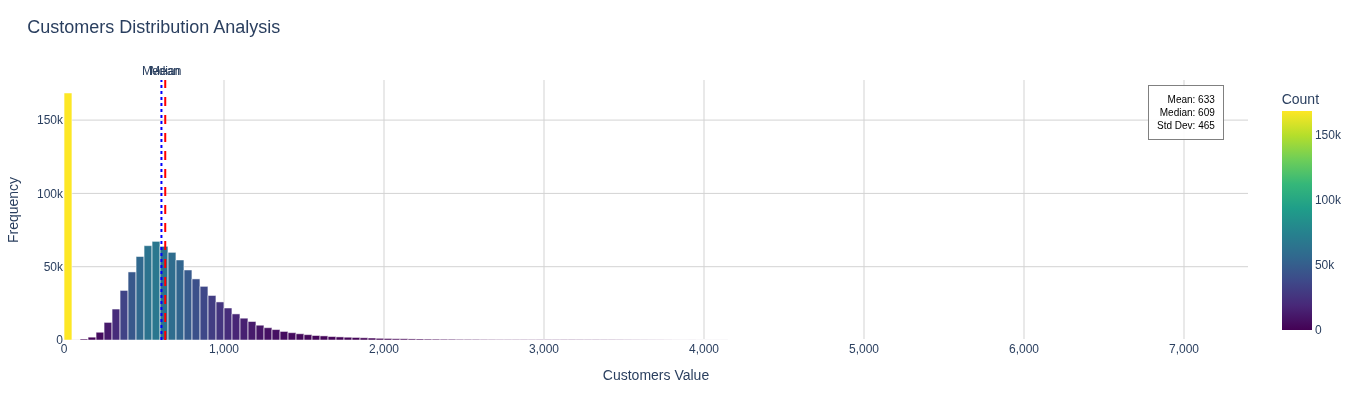


Customers Distribution Summary:
----------------------------------------
Total Records: 982,644
Min Customers: 0
Max Customers: 7,388
Mean Customers: 632.77
Median Customers: 609.00
Standard Deviation: 465.40
Bin Width: 50
Number of Bins: 148


In [13]:
# Create histogram bins more efficiently
max_sales = df_features['customers'].max()
bin_width = 50
bins = np.arange(0, max_sales + bin_width, bin_width)

# Calculate histogram
counts, bin_edges = np.histogram(df_features['customers'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create improved bar chart
fig = px.bar(
    x=bin_centers, 
    y=counts,
    labels={
        'x': 'Customers Value', 
        'y': 'Frequency',
        'color': 'Count'
    },
    title='Customers Distribution',
    color=counts,  # Color gradient based on frequency
    color_continuous_scale='viridis'
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Customers Distribution Analysis',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Customers Value',
    yaxis_title='Frequency',
    bargap=0.02,  # Minimal gap for histogram effect
    font=dict(size=12),
    plot_bgcolor='white',
    width=1050,
    height=400,
    margin=dict(t=80, b=60, l=60, r=60),
    # FIXED: Proper axis formatting for px.bar figures
    xaxis=dict(
        tickformat=',',  # Add thousands separator
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

# Improve trace styling
fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white'
)

# Add statistical annotations
mean_sales = df_features['customers'].mean()
median_sales = df_features['customers'].median()
std_sales = df_features['customers'].std()

fig.add_annotation(
    text=f"Mean: {mean_sales:,.0f}<br>Median: {median_sales:,.0f}<br>Std Dev: {std_sales:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

# Add vertical lines for mean and median
fig.add_vline(
    x=mean_sales, 
    line_dash="dash", 
    line_color="red",
    annotation_text="Mean",
    annotation_position="top"
)

fig.add_vline(
    x=median_sales, 
    line_dash="dot", 
    line_color="blue",
    annotation_text="Median",
    annotation_position="top"
)

fig.show()

# Print summary statistics
print("\nCustomers Distribution Summary:")
print("-" * 40)
print(f"Total Records: {len(df_features):,}")
print(f"Min Customers: {df_features['customers'].min():,}")
print(f"Max Customers: {df_features['customers'].max():,}")
print(f"Mean Customers: {mean_sales:,.2f}")
print(f"Median Customers: {median_sales:,.2f}")
print(f"Standard Deviation: {std_sales:,.2f}")
print(f"Bin Width: {bin_width}")
print(f"Number of Bins: {len(counts)}")

## 3.6 Customer Analysis

#### Average Customers Trend per Day

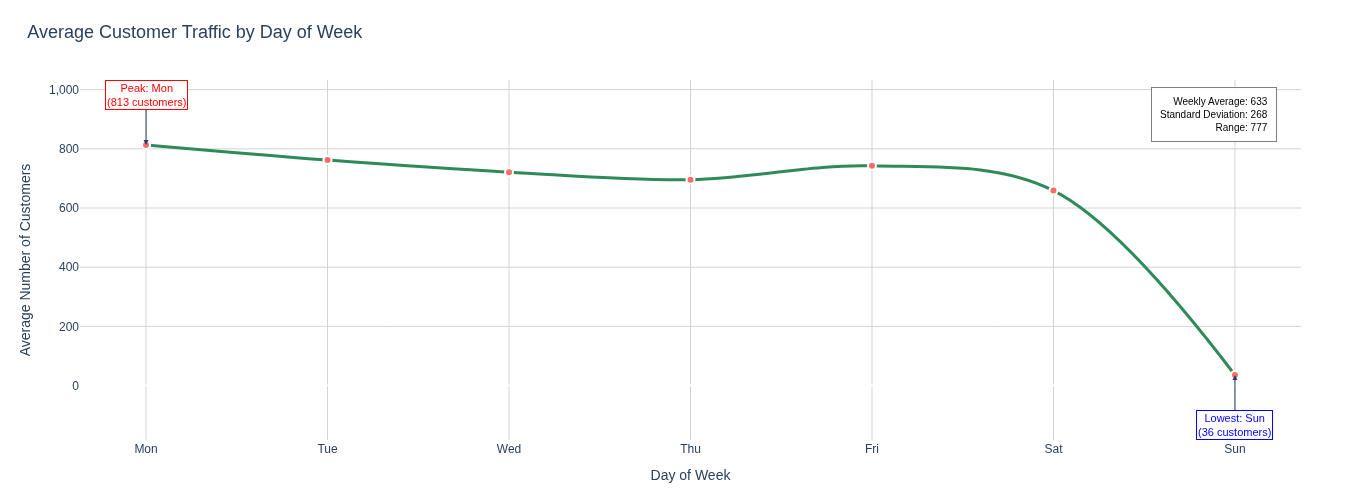


Weekday Customer Traffic Summary:
---------------------------------------------
Mon: 813 customers (100.0% of peak)
Tue: 762 customers (93.7% of peak)
Wed: 721 customers (88.7% of peak)
Thu: 696 customers (85.6% of peak)
Fri: 743 customers (91.3% of peak)
Sat: 659 customers (81.0% of peak)
Sun: 36 customers (4.4% of peak)

Weekly Statistics:
Average daily customers: 633
Peak day: Mon (813 customers)
Lowest day: Sun (36 customers)
Difference (Peak - Lowest): 777 customers


In [14]:

# Define weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Calculate mean customers by day
dow_agg = df_features.groupby('day', as_index=False)[['customers']].mean()

# Apply categorical ordering
dow_agg['day'] = pd.Categorical(dow_agg['day'], categories=weekday_order, ordered=True)
dow_agg = dow_agg.sort_values('day')

# Identify peak and lowest days
peak_row = dow_agg.loc[dow_agg['customers'].idxmax()]
lowest_row = dow_agg.loc[dow_agg['customers'].idxmin()]
peak_day = peak_row['day']
peak_value = peak_row['customers']
lowest_day = lowest_row['day']
lowest_value = lowest_row['customers']

# Create enhanced line chart
fig = px.line(
    dow_agg, 
    x='day', 
    y='customers', 
    title='Average Customer Traffic by Day of Week',
    markers=True,
    line_shape='spline'  # Smooth curve
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Customer Traffic by Day of Week',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Day of Week',
    yaxis_title='Average Number of Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=900,
    height=500,
    margin=dict(t=80, b=60, l=80, r=60),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#2E8B57'),
    marker=dict(
        size=8,
        color='#FF6B6B',
        line=dict(width=2, color='white')
    )
)

# Add annotation for peak day
fig.add_annotation(
    x=peak_day,
    y=peak_value,
    text=f"Peak: {peak_day}<br>({peak_value:,.0f} customers)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-50,
    font=dict(color="red", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Add annotation for lowest day
fig.add_annotation(
    x=lowest_day,
    y=lowest_value,
    text=f"Lowest: {lowest_day}<br>({lowest_value:,.0f} customers)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=50,
    font=dict(color="blue", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add summary statistics box
avg_customers = dow_agg['customers'].mean()
std_customers = dow_agg['customers'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Weekly Average: {avg_customers:,.0f}<br>Standard Deviation: {std_customers:,.0f}<br>Range: {range_customers:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed summary
print("\nWeekday Customer Traffic Summary:")
print("-" * 45)
for _, row in dow_agg.iterrows():
    day = row['day']
    customers = row['customers']
    percentage_of_peak = (customers / peak_value) * 100
    print(f"{day}: {customers:,.0f} customers ({percentage_of_peak:.1f}% of peak)")

print(f"\nWeekly Statistics:")
print(f"Average daily customers: {avg_customers:,.0f}")
print(f"Peak day: {peak_day} ({peak_value:,.0f} customers)")
print(f"Lowest day: {lowest_day} ({lowest_value:,.0f} customers)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} customers")

#### Average Customers Trend per Month

In [15]:
# Ensure month is ordered
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate monthly averages
monthly_grp = df_features.groupby('month', as_index=False)['customers'].mean()
monthly_grp['month'] = pd.Categorical(monthly_grp['month'], categories=month_order, ordered=True)
monthly_grp = monthly_grp.sort_values('month')

# Identify peak and lowest months
peak_row = monthly_grp.loc[monthly_grp['customers'].idxmax()]
lowest_row = monthly_grp.loc[monthly_grp['customers'].idxmin()]
peak_month = peak_row['month']
peak_value = peak_row['customers']
lowest_month = lowest_row['month']
lowest_value = lowest_row['customers']

# Create enhanced line chart
fig = px.line(
    monthly_grp, 
    x='month', 
    y='customers',
    markers=True,
    title='Average Customer Traffic by Month',
    labels={'customers': 'Average Customers', 'month': 'Month'},
    line_shape='spline'  # Smooth curves for better trend visualization
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Customer Traffic by Month',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Month',
    yaxis_title='Average Number of Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1000,
    height=550,
    margin=dict(t=80, b=60, l=80, r=80),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#1f77b4'),
    marker=dict(
        size=10,
        color='#ff7f0e',
        line=dict(width=2, color='white')
    )
)

# Annotate peak month
fig.add_annotation(
    x=peak_month, 
    y=peak_value,
    text=f'Peak: {peak_month}<br>({peak_value:,.0f} customers)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='red',
    font=dict(color='red', size=11),
    yshift=20,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Annotate lowest month
fig.add_annotation(
    x=lowest_month, 
    y=lowest_value,
    text=f'Lowest: {lowest_month}<br>({lowest_value:,.0f} customers)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(color='blue', size=11),
    yshift=-30,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add seasonal analysis
spring_months = ['Mar', 'Apr', 'May']
summer_months = ['Jun', 'Jul', 'Aug']
fall_months = ['Sep', 'Oct', 'Nov']
winter_months = ['Dec', 'Jan', 'Feb']

spring_avg = monthly_grp[monthly_grp['month'].isin(spring_months)]['customers'].mean()
summer_avg = monthly_grp[monthly_grp['month'].isin(summer_months)]['customers'].mean()
fall_avg = monthly_grp[monthly_grp['month'].isin(fall_months)]['customers'].mean()
winter_avg = monthly_grp[monthly_grp['month'].isin(winter_months)]['customers'].mean()

# Add summary statistics
yearly_avg = monthly_grp['customers'].mean()
yearly_std = monthly_grp['customers'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Yearly Average: {yearly_avg:,.0f}<br>" +
         f"Standard Deviation: {yearly_std:,.0f}<br>" +
         f"Range: {range_customers:,.0f}<br><br>" +
         f"Seasonal Averages:<br>" +
         f"Spring: {spring_avg:,.0f}<br>" +
         f"Summer: {summer_avg:,.0f}<br>" +
         f"Fall: {fall_avg:,.0f}<br>" +
         f"Winter: {winter_avg:,.0f}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Middle left side
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed monthly summary
print("\nMonthly Customer Traffic Summary:")
print("-" * 50)
for _, row in monthly_grp.iterrows():
    month = row['month']
    customers = row['customers']
    percentage_of_peak = (customers / peak_value) * 100
    print(f"{month}: {customers:,.0f} customers ({percentage_of_peak:.1f}% of peak)")

print(f"\nYearly Statistics:")
print(f"Average monthly customers: {yearly_avg:,.0f}")
print(f"Peak month: {peak_month} ({peak_value:,.0f} customers)")
print(f"Lowest month: {lowest_month} ({lowest_value:,.0f} customers)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} customers")

print(f"\nSeasonal Analysis:")
print(f"Spring (Mar-May): {spring_avg:,.0f} customers")
print(f"Summer (Jun-Aug): {summer_avg:,.0f} customers") 
print(f"Fall (Sep-Nov): {fall_avg:,.0f} customers")
print(f"Winter (Dec-Feb): {winter_avg:,.0f} customers")


Monthly Customer Traffic Summary:
--------------------------------------------------
Jan: 602 customers (85.6% of peak)
Feb: 627 customers (89.1% of peak)
Mar: 629 customers (89.5% of peak)
Apr: 631 customers (89.7% of peak)
May: 602 customers (85.6% of peak)
Jun: 625 customers (88.9% of peak)
Jul: 664 customers (94.4% of peak)
Aug: 642 customers (91.4% of peak)
Sep: 634 customers (90.2% of peak)
Oct: 631 customers (89.8% of peak)
Nov: 654 customers (93.0% of peak)
Dec: 703 customers (100.0% of peak)

Yearly Statistics:
Average monthly customers: 637
Peak month: Dec (703 customers)
Lowest month: Jan (602 customers)
Difference (Peak - Lowest): 101 customers

Seasonal Analysis:
Spring (Mar-May): 621 customers
Summer (Jun-Aug): 644 customers
Fall (Sep-Nov): 640 customers
Winter (Dec-Feb): 644 customers


#### Top 10 Crowded Stores

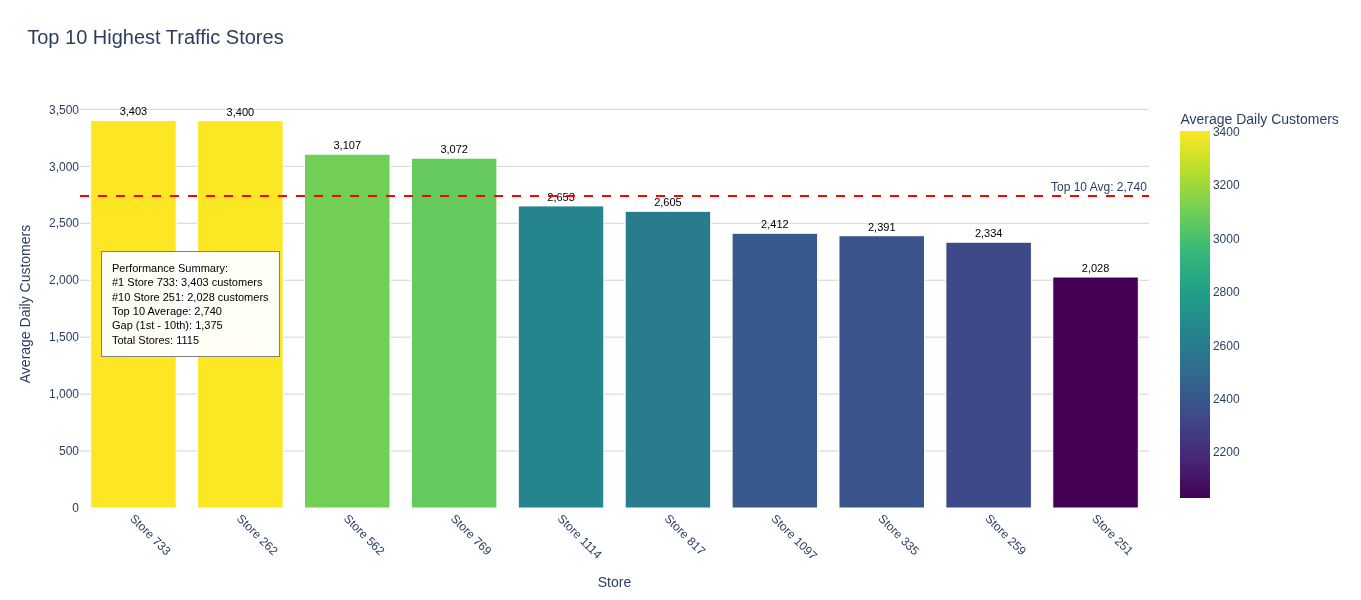


Top 10 Stores Performance Analysis:
Rank Store ID Avg Customers   % of #1 Store
-------------------------------------------------------
1    733           3,403        100.0%
2    262           3,400         99.9%
3    562           3,107         91.3%
4    769           3,072         90.2%
5    1114          2,653         77.9%
6    817           2,605         76.5%
7    1097          2,412         70.9%
8    335           2,391         70.2%
9    259           2,334         68.6%
10   251           2,028         59.6%

Summary Statistics:
-------------------------
Total stores analyzed: 1115
Top 10 average: 2,740 customers
Performance range: 1,375 customers
Standard deviation: 477

Comparative Analysis:
--------------------
Overall store average: 629 customers
Top 10 outperform overall average by: 335.7%


In [16]:
# Group and get top 10 stores with highest average customers
top10_crowded_store = (
    df_features.groupby('store', as_index=False)['customers']
    .mean()
    .nlargest(10, 'customers')
)

# Add ranking column for better visualization
top10_crowded_store['rank'] = range(1, 11)
top10_crowded_store['store_label'] = 'Store ' + top10_crowded_store['store'].astype(str)

# Create enhanced bar chart
fig = px.bar(
    top10_crowded_store,
    x='store_label',
    y='customers',
    title='Top 10 Highest Traffic Stores',
    labels={'store_label': 'Store', 'customers': 'Average Daily Customers'},
    color='customers',  # Color gradient based on customer count
    color_continuous_scale='viridis',
    text='customers'  # Show values on bars
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Top 10 Highest Traffic Stores',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Store',
    yaxis_title='Average Daily Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1200,
    height=600,
    margin=dict(t=100, b=80, l=80, r=80),
    xaxis=dict(
        showgrid=False,
        tickangle=45  # Rotate labels for better readability
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    ),
    showlegend=False  # Hide color scale legend for cleaner look
)

# Format text on bars
fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='outside',
    textfont_size=11,
    textfont_color='black',
    marker_line_width=1,
    marker_line_color='white'
)

# Add performance insights
top_store = top10_crowded_store.iloc[0]
bottom_store = top10_crowded_store.iloc[-1]
avg_of_top10 = top10_crowded_store['customers'].mean()
total_stores = df_features['store'].nunique()

# Add summary annotation
fig.add_annotation(
    text=f"Performance Summary:<br>" +
         f"#1 Store {top_store['store']}: {top_store['customers']:,.0f} customers<br>" +
         f"#10 Store {bottom_store['store']}: {bottom_store['customers']:,.0f} customers<br>" +
         f"Top 10 Average: {avg_of_top10:,.0f}<br>" +
         f"Gap (1st - 10th): {top_store['customers'] - bottom_store['customers']:,.0f}<br>" +
         f"Total Stores: {total_stores}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Left center
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=11, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.95)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=10
)

# Add reference line for top 10 average
fig.add_hline(
    y=avg_of_top10,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Top 10 Avg: {avg_of_top10:,.0f}",
    annotation_position="top right"
)

fig.show()

# Enhanced data analysis
print("\nTop 10 Stores Performance Analysis:")
print("=" * 55)
print(f"{'Rank':<4} {'Store ID':<8} {'Avg Customers':<15} {'% of #1 Store':<12}")
print("-" * 55)

for i, row in top10_crowded_store.iterrows():
    rank = row['rank']
    store_id = row['store']
    customers = row['customers']
    pct_of_top = (customers / top_store['customers']) * 100
    print(f"{rank:<4} {store_id:<8} {customers:>10,.0f}     {pct_of_top:>8.1f}%")

print(f"\nSummary Statistics:")
print("-" * 25)
print(f"Total stores analyzed: {total_stores}")
print(f"Top 10 average: {avg_of_top10:,.0f} customers")
print(f"Performance range: {top_store['customers'] - bottom_store['customers']:,.0f} customers")
print(f"Standard deviation: {top10_crowded_store['customers'].std():,.0f}")

# Additional insights
overall_avg = df_features.groupby('store')['customers'].mean().mean()
top10_vs_overall = ((avg_of_top10 / overall_avg) - 1) * 100

print(f"\nComparative Analysis:")
print("-" * 20)
print(f"Overall store average: {overall_avg:,.0f} customers")
print(f"Top 10 outperform overall average by: {top10_vs_overall:.1f}%")

## 3.7 Customer Analysis

#### Average SalesTrend per Day

## Correlation Analysis

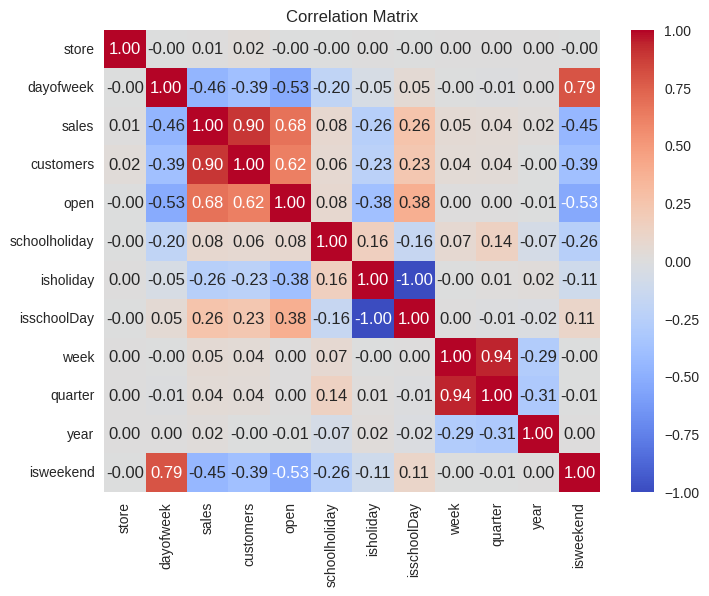

In [17]:
corr = df_features.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sbn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Sales By Holiday Status

## Holiday and Schoolday Impact

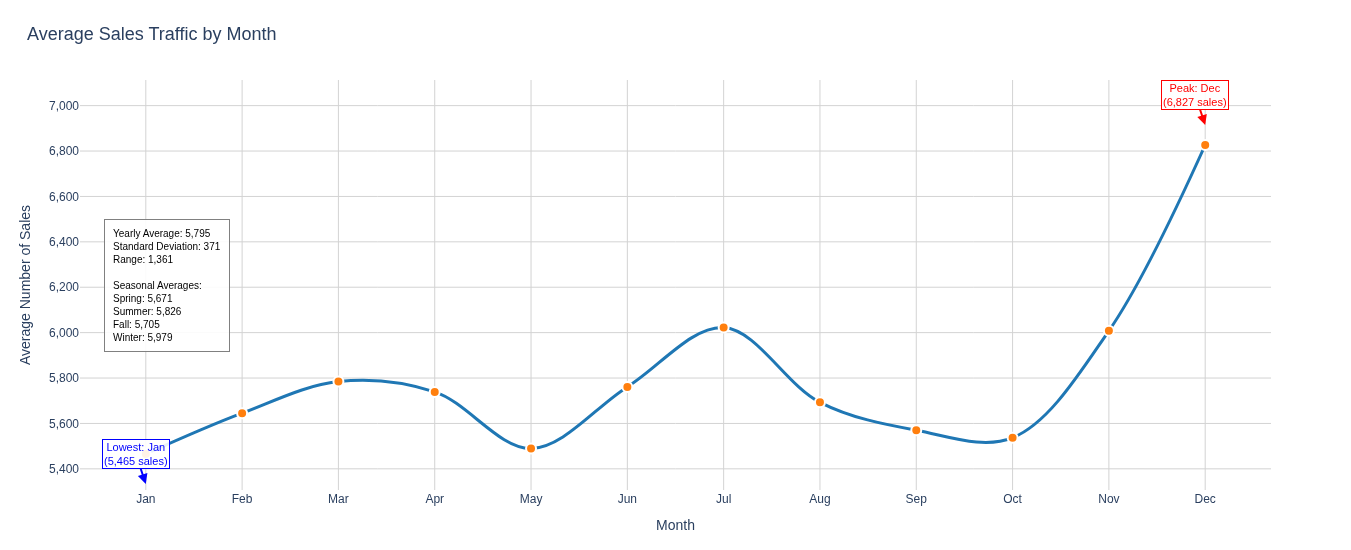


Monthly Sales Traffic Summary:
--------------------------------------------------
Jan: 5,465 sales (80.1% of peak)
Feb: 5,645 sales (82.7% of peak)
Mar: 5,785 sales (84.7% of peak)
Apr: 5,739 sales (84.1% of peak)
May: 5,490 sales (80.4% of peak)
Jun: 5,761 sales (84.4% of peak)
Jul: 6,023 sales (88.2% of peak)
Aug: 5,693 sales (83.4% of peak)
Sep: 5,570 sales (81.6% of peak)
Oct: 5,537 sales (81.1% of peak)
Nov: 6,008 sales (88.0% of peak)
Dec: 6,827 sales (100.0% of peak)

Yearly Statistics:
Average monthly sales: 5,795
Peak month: Dec (6,827 sales)
Lowest month: Jan (5,465 sales)
Difference (Peak - Lowest): 1,361 sales

Seasonal Analysis:
Spring (Mar-May): 5,671 sales
Summer (Jun-Aug): 5,826 sales
Fall (Sep-Nov): 5,705 sales
Winter (Dec-Feb): 5,979 sales


In [18]:
# Ensure month is ordered
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate monthly averages
monthly_grp = df_features.groupby('month', as_index=False)['sales'].mean()
monthly_grp['month'] = pd.Categorical(monthly_grp['month'], categories=month_order, ordered=True)
monthly_grp = monthly_grp.sort_values('month')

# Identify peak and lowest months
peak_row = monthly_grp.loc[monthly_grp['sales'].idxmax()]
lowest_row = monthly_grp.loc[monthly_grp['sales'].idxmin()]
peak_month = peak_row['month']
peak_value = peak_row['sales']
lowest_month = lowest_row['month']
lowest_value = lowest_row['sales']

# Create enhanced line chart
fig = px.line(
    monthly_grp, 
    x='month', 
    y='sales',
    markers=True,
    title='Average Sales Traffic by Month',
    labels={'customers': 'Average Sales', 'month': 'Month'},
    line_shape='spline'  # Smooth curves for better trend visualization
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Sales Traffic by Month',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Month',
    yaxis_title='Average Number of Sales',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1000,
    height=550,
    margin=dict(t=80, b=60, l=80, r=80),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#1f77b4'),
    marker=dict(
        size=10,
        color='#ff7f0e',
        line=dict(width=2, color='white')
    )
)

# Annotate peak month
fig.add_annotation(
    x=peak_month, 
    y=peak_value,
    text=f'Peak: {peak_month}<br>({peak_value:,.0f} sales)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='red',
    font=dict(color='red', size=11),
    yshift=20,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Annotate lowest month
fig.add_annotation(
    x=lowest_month, 
    y=lowest_value,
    text=f'Lowest: {lowest_month}<br>({lowest_value:,.0f} sales)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(color='blue', size=11),
    yshift=-30,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add seasonal analysis
spring_months = ['Mar', 'Apr', 'May']
summer_months = ['Jun', 'Jul', 'Aug']
fall_months = ['Sep', 'Oct', 'Nov']
winter_months = ['Dec', 'Jan', 'Feb']

spring_avg = monthly_grp[monthly_grp['month'].isin(spring_months)]['sales'].mean()
summer_avg = monthly_grp[monthly_grp['month'].isin(summer_months)]['sales'].mean()
fall_avg = monthly_grp[monthly_grp['month'].isin(fall_months)]['sales'].mean()
winter_avg = monthly_grp[monthly_grp['month'].isin(winter_months)]['sales'].mean()

# Add summary statistics
yearly_avg = monthly_grp['sales'].mean()
yearly_std = monthly_grp['sales'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Yearly Average: {yearly_avg:,.0f}<br>" +
         f"Standard Deviation: {yearly_std:,.0f}<br>" +
         f"Range: {range_customers:,.0f}<br><br>" +
         f"Seasonal Averages:<br>" +
         f"Spring: {spring_avg:,.0f}<br>" +
         f"Summer: {summer_avg:,.0f}<br>" +
         f"Fall: {fall_avg:,.0f}<br>" +
         f"Winter: {winter_avg:,.0f}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Middle left side
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed monthly summary
print("\nMonthly Sales Traffic Summary:")
print("-" * 50)
for _, row in monthly_grp.iterrows():
    month = row['month']
    sales = row['sales']
    percentage_of_peak = (sales / peak_value) * 100
    print(f"{month}: {sales:,.0f} sales ({percentage_of_peak:.1f}% of peak)")

print(f"\nYearly Statistics:")
print(f"Average monthly sales: {yearly_avg:,.0f}")
print(f"Peak month: {peak_month} ({peak_value:,.0f} sales)")
print(f"Lowest month: {lowest_month} ({lowest_value:,.0f} sales)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} sales")

print(f"\nSeasonal Analysis:")
print(f"Spring (Mar-May): {spring_avg:,.0f} sales")
print(f"Summer (Jun-Aug): {summer_avg:,.0f} sales") 
print(f"Fall (Sep-Nov): {fall_avg:,.0f} sales")
print(f"Winter (Dec-Feb): {winter_avg:,.0f} sales")